In [ ]:
'''
Find clustering inside a dataset.

1. Pick K numbers of cluster
2. Select K random points in your dataset
3. Assign each value in data set to their closet cluster
4. Computer new points to closet cluster
5. Reassign each point to closest cluter, repeat set 4.
6. Finish

Choose the best number of cluster: Within cluster some of squares (WCSS)
'''

In [9]:
# Import librarys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
'''
We have been hired to split the data about the customer in a mall to
split them into optimal categories based on their spending score in
this mall.

We will have to decide how many group to split these into.
'''

'\nWe have been hired to split the data about the customer in a mall to\nsplit them into optimal categories based on their spending score in\nthis mall.\n\nWe will have to decide how many group to split these into.\n'

In [6]:
# Import the dataset
root = '/Users/Haydn/Documents/Code/Jupyter/Machine Learning A-Z/1.0 - Example Data/'
data_file = root + 'Part 4 - Clustering/Mall_Customers.csv'
dataset = pd.read_csv(data_file)

# Spending score - the more or less that customer spends
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
# Splitting features and outcomes
x = dataset.iloc[:, [3, 4]].values # anual income and spending score
# y = dataset.iloc[:, 3].values #

[]

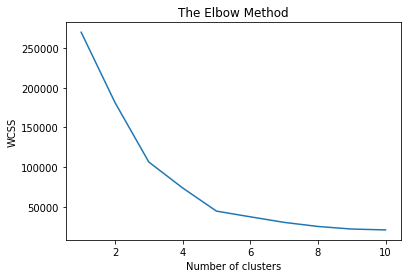

In [10]:
# Using WCSS to find most optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot()

In [12]:
# Applying optimal clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Customer >> Cluster
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

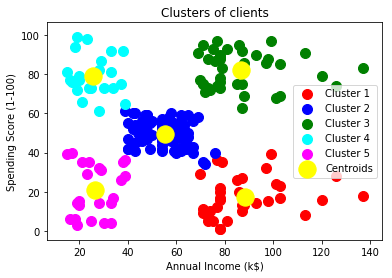

In [18]:
# Graph it...
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red',     label='Careful')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue',    label='Standard')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green',   label='Target')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='cyan',    label='Sensible')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='magenta', label='Cen')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
